In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
%matplotlib inline
import seaborn as sns
df=pd.read_csv(r'C:\Users\DELL\Downloads\2015-building-energy-benchmarking.csv')
#predict the emissions of buildings whose emissions have not yet been measured.

In [2]:
#basic data analysis,quick view of data set
#showes first five rows of the data se
df.head()
#47 columns

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,...,GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,"{'latitude': '47.61219025', 'longitude': '-122...",7,DOWNTOWN,1927,...,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,"{'latitude': '47.61310583', 'longitude': '-122...",7,DOWNTOWN,1996,...,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,"{'latitude': '47.61334897', 'longitude': '-122...",7,DOWNTOWN,1969,...,1.92,Yes,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,18081
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,"{'latitude': '47.61421585', 'longitude': '-122...",7,DOWNTOWN,1926,...,31.38,No,NaN,Compliant,High Outlier,NaN,56.0,NaN,31.0,18081
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,"{'latitude': '47.6137544', 'longitude': '-122....",7,DOWNTOWN,1980,...,4.02,No,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,19576


In [3]:
#summary statistics
df.describe()

,OSEBuildingID,DataYear,CouncilDistrictCode,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,...,NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
count,3340.000000,3340.0,3340.000000,3340.000000,3340.000000,3332.000000,3.340000e+03,3340.000000,3.340000e+03,3.204000e+03,...,3.330000e+03,3.330000e+03,3.330000e+03,3330.000000,3330.000000,224.000000,3338.000000,213.000000,3338.000000,3340.000000
mean,20522.168263,2015.0,4.450898,1967.624850,1.035629,4.682173,9.077289e+04,11054.032335,7.971886e+04,7.488154e+04,...,1.253304e+04,1.253304e+06,7.142301e+03,110.094102,0.985339,123.062500,32.380168,1.347418,24.825644,18786.680240
std,11511.515874,0.0,2.127203,32.949847,0.784463,5.458460,1.493058e+05,35296.330507,1.292314e+05,1.236249e+05,...,4.415142e+04,4.415142e+06,1.962790e+05,409.450179,1.637172,5.812128,19.907567,0.477272,15.006287,588.604192
min,1.000000,2015.0,1.000000,1900.000000,1.000000,0.000000,2.000000e+04,-3.000000,-5.055000e+04,5.872000e+03,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,116.000000,1.000000,1.000000,1.000000,17916.000000
25%,19921.750000,2015.0,3.000000,1947.000000,1.000000,2.000000,2.848700e+04,0.000000,2.668300e+04,2.500000e+04,...,0.000000e+00,0.000000e+00,0.000000e+00,9.265000,0.080000,117.000000,14.000000,1.000000,10.000000,18379.000000
50%,22977.000000,2015.0,4.000000,1973.000000,1.000000,4.000000,4.385500e+04,0.000000,4.132600e+04,3.900000e+04,...,2.945500e+03,2.945770e+05,0.000000e+00,32.740000,0.460000,123.000000,33.000000,1.000000,26.000000,18390.000000
75%,25748.000000,2015.0,7.000000,1996.000000,1.000000,5.000000,8.842800e+04,4304.250000,7.872600e+04,7.206750e+04,...,1.115325e+04,1.115366e+06,0.000000e+00,88.642500,1.180000,125.500000,50.000000,2.000000,38.000000,19576.000000
max,50059.000000,2015.0,7.000000,2015.000000,39.000000,99.000000,2.200000e+06,512608.000000,2.200000e+06,1.719643e+06,...,1.364484e+06,1.364484e+08,8.269669e+06,11824.890000,31.380000,135.000000,61.000000,2.000000,51.000000,19584.000000


In [5]:
#nature of dataset columns (attributes).
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3340 entries, 0 to 3339
Data columns (total 47 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   OSEBuildingID                                                  3340 non-null   int64  
 1   DataYear                                                       3340 non-null   int64  
 2   BuildingType                                                   3340 non-null   object 
 3   PrimaryPropertyType                                            3340 non-null   object 
 4   PropertyName                                                   3340 non-null   object 
 5   TaxParcelIdentificationNumber                                  3338 non-null   object 
 6   Location                                                       3340 non-null   object 
 7   CouncilDistrictCode                                         

In [6]:
# Inspect missing values in the dataset
print(df.isnull().values.sum())

26512


In [7]:
# Impute the missing values with mean imputation
df = df.fillna(df.mean())

In [8]:
# Inspect missing values in the dataset
print(df.isnull().values.sum())
#14640

14640


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3340 entries, 0 to 3339
Data columns (total 47 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   OSEBuildingID                                                  3340 non-null   int64  
 1   DataYear                                                       3340 non-null   int64  
 2   BuildingType                                                   3340 non-null   object 
 3   PrimaryPropertyType                                            3340 non-null   object 
 4   PropertyName                                                   3340 non-null   object 
 5   TaxParcelIdentificationNumber                                  3338 non-null   object 
 6   Location                                                       3340 non-null   object 
 7   CouncilDistrictCode                                         

In [10]:
# Impute the missing values with mode for categorical variables
df = df.fillna(df.mode())

In [11]:
# Inspect missing values in the dataset
print(df.isnull().values.sum())
#14640

14623


In [20]:
#sort the column
df=df.reindex(sorted(df.columns), axis=1)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3340 entries, 0 to 3339
Data columns (total 39 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   2010 Census Tracts                                             3340 non-null   float64
 1   BuildingType                                                   3340 non-null   object 
 2   City Council Districts                                         3340 non-null   float64
 3   ComplianceStatus                                               3340 non-null   object 
 4   CouncilDistrictCode                                            3340 non-null   int64  
 5   DataYear                                                       3340 non-null   int64  
 6   DefaultData                                                    3339 non-null   object 
 7   ENERGYSTARScore                                             

In [38]:
#drop the columns which has lot of missing values
df.drop(['Comment','Outlier','SecondLargestPropertyUseType','ThirdLargestPropertyUseType','YearsENERGYSTARCertified'
         'LargestPropertyUseType','Zip Codes','ListOfAllPropertyUseTypes','LargestPropertyUseType','TaxParcelIdentificationNumber','DefaultData'] ,axis=1, inplace=True)

TypeError: 'list' object is not callable

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3340 entries, 0 to 3339
Data columns (total 39 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   2010 Census Tracts                                             3340 non-null   float64
 1   BuildingType                                                   3340 non-null   object 
 2   City Council Districts                                         3340 non-null   float64
 3   ComplianceStatus                                               3340 non-null   object 
 4   CouncilDistrictCode                                            3340 non-null   int64  
 5   DataYear                                                       3340 non-null   int64  
 6   DefaultData                                                    3339 non-null   object 
 7   ENERGYSTARScore                                             

In [40]:
print(df.isnull().values.sum())

3


In [42]:
df.drop=(["DefaultData","TaxParcelIdentificationNumber"])

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3340 entries, 0 to 3339
Data columns (total 39 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   2010 Census Tracts                                             3340 non-null   float64
 1   BuildingType                                                   3340 non-null   object 
 2   City Council Districts                                         3340 non-null   float64
 3   ComplianceStatus                                               3340 non-null   object 
 4   CouncilDistrictCode                                            3340 non-null   int64  
 5   DataYear                                                       3340 non-null   int64  
 6   DefaultData                                                    3339 non-null   object 
 7   ENERGYSTARScore                                             

In [44]:
print(df.isnull().values.sum())

3


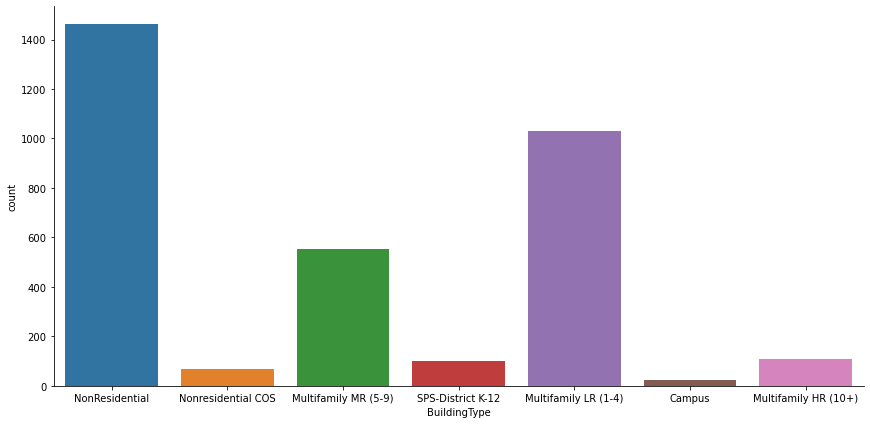

In [49]:
# seaborn histogram 
#plt.figure(figsize=(25,255))
sns.catplot(x="BuildingType", kind="count",height=6, aspect=2,data=df)
#Catplot Python Seaborn: One Function to Rule All Plots With Categorical Variables


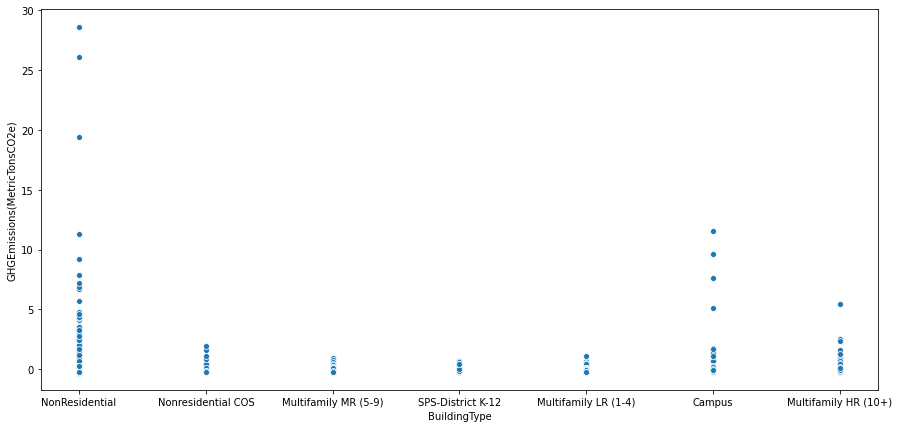

In [50]:
#seaborn Scatterplot
#(z-score )normalization is applied on "TotalGHGEmissions"
plt.figure(figsize=(15,7))
df["GHGEmissions(MetricTonsCO2e)"]=(df["GHGEmissions(MetricTonsCO2e)"]-df["GHGEmissions(MetricTonsCO2e)"].mean())/df["GHGEmissions(MetricTonsCO2e)"].std()
sns.scatterplot(x=df['BuildingType'], y=df['GHGEmissions(MetricTonsCO2e)'])
#NonResidentials buildings are higher in GHGEmissions(MetricTonsCO2e)


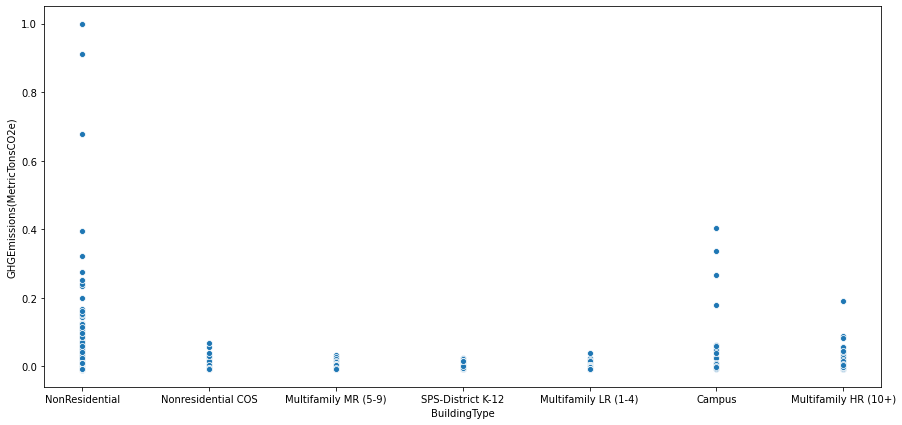

In [51]:
#simple feature scaling(range 0-1)
#xnew=xold/xmax
#seaborn Scatterplot
plt.figure(figsize=(15,7))
df["GHGEmissions(MetricTonsCO2e)"]=(df["GHGEmissions(MetricTonsCO2e)"])/df["GHGEmissions(MetricTonsCO2e)"].max()
sns.scatterplot(x=df['BuildingType'], y=df["GHGEmissions(MetricTonsCO2e)"])

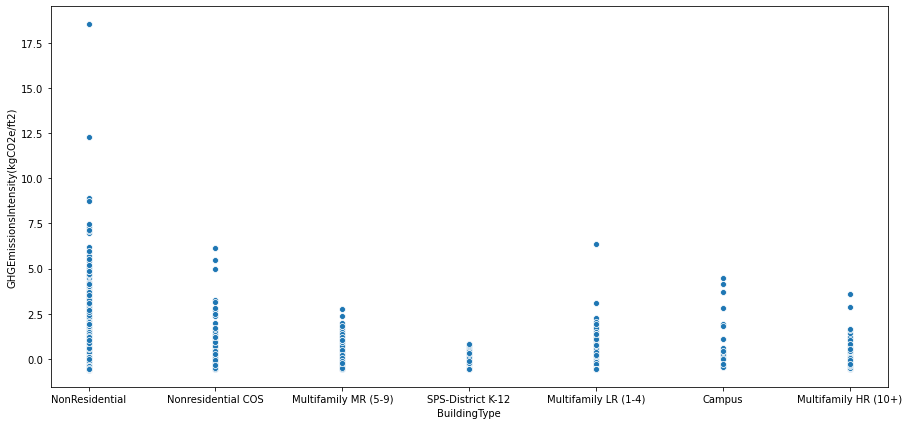

In [52]:
#(z-score )normalization is applied on "TotalGHGEmissions"
plt.figure(figsize=(15,7))
df["GHGEmissionsIntensity(kgCO2e/ft2)"]=(df["GHGEmissionsIntensity(kgCO2e/ft2)"]-df["GHGEmissionsIntensity(kgCO2e/ft2)"].mean())/df["GHGEmissionsIntensity(kgCO2e/ft2)"].std()
sns.scatterplot(x=df['BuildingType'], y=df['GHGEmissionsIntensity(kgCO2e/ft2)'])
#NonResidentials buildings are higher in GHGEmissions(MetricTonsCO2e)

In [46]:
df_nr=df[(df['BuildingType'] =='NonResidential') ]

In [47]:
df_nr.head()

,2010 Census Tracts,BuildingType,City Council Districts,ComplianceStatus,CouncilDistrictCode,DataYear,DefaultData,ENERGYSTARScore,Electricity(kBtu),Electricity(kWh),...,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SteamUse(kBtu),TaxParcelIdentificationNumber,ThirdLargestPropertyUseTypeGFA,YearBuilt
0,123.0625,NonResidential,1.347418,Compliant,7,2015,No,65.0,3686160.0,1080307.0,...,78.9,80.3,6981428.0,7097539.0,173.5,175.1,2023032.0,659000030,10755.708929,1927
1,123.0625,NonResidential,1.347418,Compliant,7,2015,No,51.0,3905411.0,1144563.0,...,94.4,99.0,8354235.0,8765788.0,191.3,195.2,0.0,659000220,4622.000000,1996
2,123.0625,NonResidential,1.347418,Compliant,7,2015,Yes,18.0,49762435.0,14583930.0,...,96.6,99.7,73130656.0,75506272.0,242.7,246.5,19660404.0,659000475,0.000000,1969
3,123.0625,NonResidential,1.347418,Compliant,7,2015,No,1.0,2769023.0,811521.0,...,460.4,462.5,28229320.0,28363444.0,636.3,643.2,23458518.0,659000640,10755.708929,1926
4,123.0625,NonResidential,1.347418,Compliant,7,2015,No,67.0,6066245.0,1777841.0,...,120.1,122.1,14829099.0,15078243.0,228.8,227.1,0.0,659000970,0.000000,1980


In [48]:
df_nr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1461 entries, 0 to 3334
Data columns (total 39 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   2010 Census Tracts                                             1461 non-null   float64
 1   BuildingType                                                   1461 non-null   object 
 2   City Council Districts                                         1461 non-null   float64
 3   ComplianceStatus                                               1461 non-null   object 
 4   CouncilDistrictCode                                            1461 non-null   int64  
 5   DataYear                                                       1461 non-null   int64  
 6   DefaultData                                                    1460 non-null   object 
 7   ENERGYSTARScore                                             

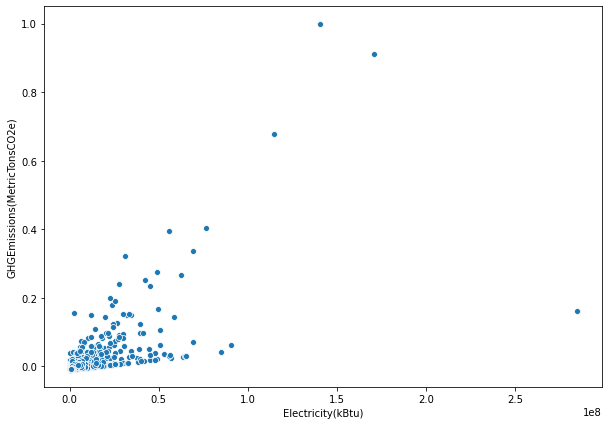

In [53]:
plt.figure(figsize=(10,7))
sns.scatterplot(x=df['Electricity(kBtu)'], y=df["GHGEmissions(MetricTonsCO2e)"])

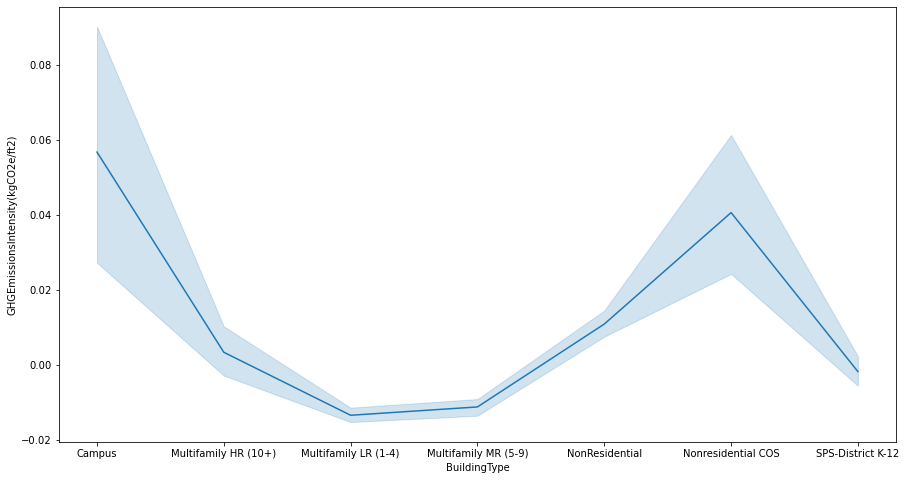

In [56]:
#line plot 
df["GHGEmissionsIntensity(kgCO2e/ft2)"]=(df["GHGEmissionsIntensity(kgCO2e/ft2)"])/df["GHGEmissionsIntensity(kgCO2e/ft2)"].max()
plt.figure(figsize=(15,8))
sns.lineplot(x='BuildingType',y='GHGEmissionsIntensity(kgCO2e/ft2)', data=df)

Text(0.5, 0, 'BuildingType')

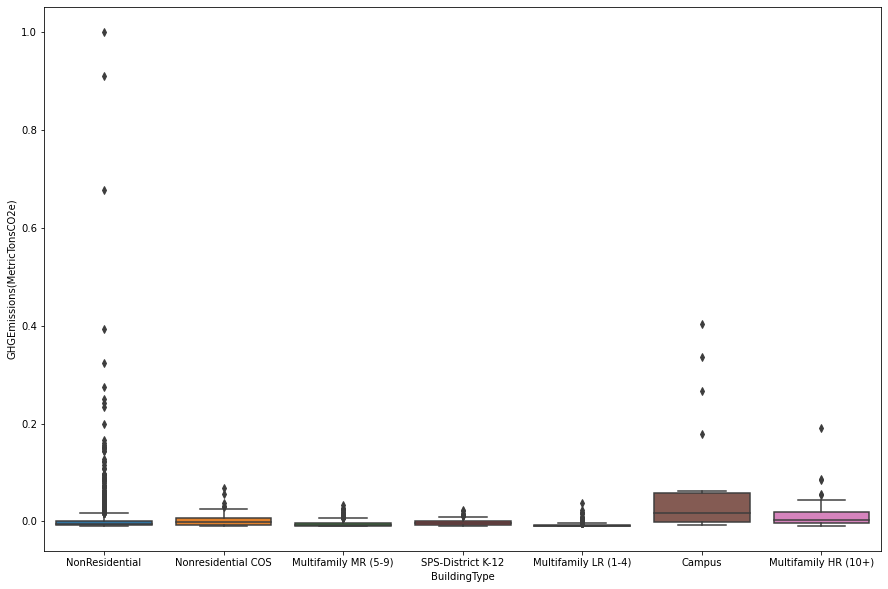

In [59]:
#Box plot
plt.figure(figsize=(15,10))
#df["GHGEmissions(MetricTonsCO2e)"]=(df["GHGEmissions(MetricTonsCO2e)"]-df["GHGEmissions(MetricTonsCO2e)"].mean())/df["GHGEmissions(MetricTonsCO2e)"].std()
df["GHGEmissions(MetricTonsCO2e)"]=(df["GHGEmissions(MetricTonsCO2e)"])/df["GHGEmissions(MetricTonsCO2e)"].max()
sns.boxplot(y ='GHGEmissions(MetricTonsCO2e)',data= df, x= 'BuildingType')
plt.xlabel('BuildingType')
## Multifamily MR (5-9),SPS-District K-12 , Multifamily LR (1-4), have almost same mean

Text(0.5, 0, 'BuildingType')

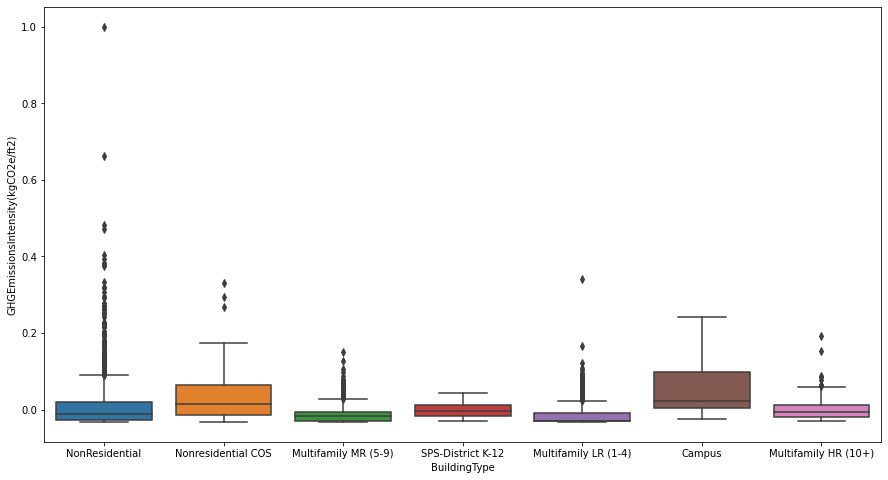

In [60]:
df["GHGEmissionsIntensity(kgCO2e/ft2)"]=(df["GHGEmissionsIntensity(kgCO2e/ft2)"])/df["GHGEmissionsIntensity(kgCO2e/ft2)"].max()
plt.figure(figsize=(15,8))
sns.boxplot(x='BuildingType',y='GHGEmissionsIntensity(kgCO2e/ft2)', data=df )
plt.xlabel('BuildingType')

In [ ]:
# NonResidential and Multifamily MR have same mean value
#Multifamily Lr and multifamily Hr have same mean distribution

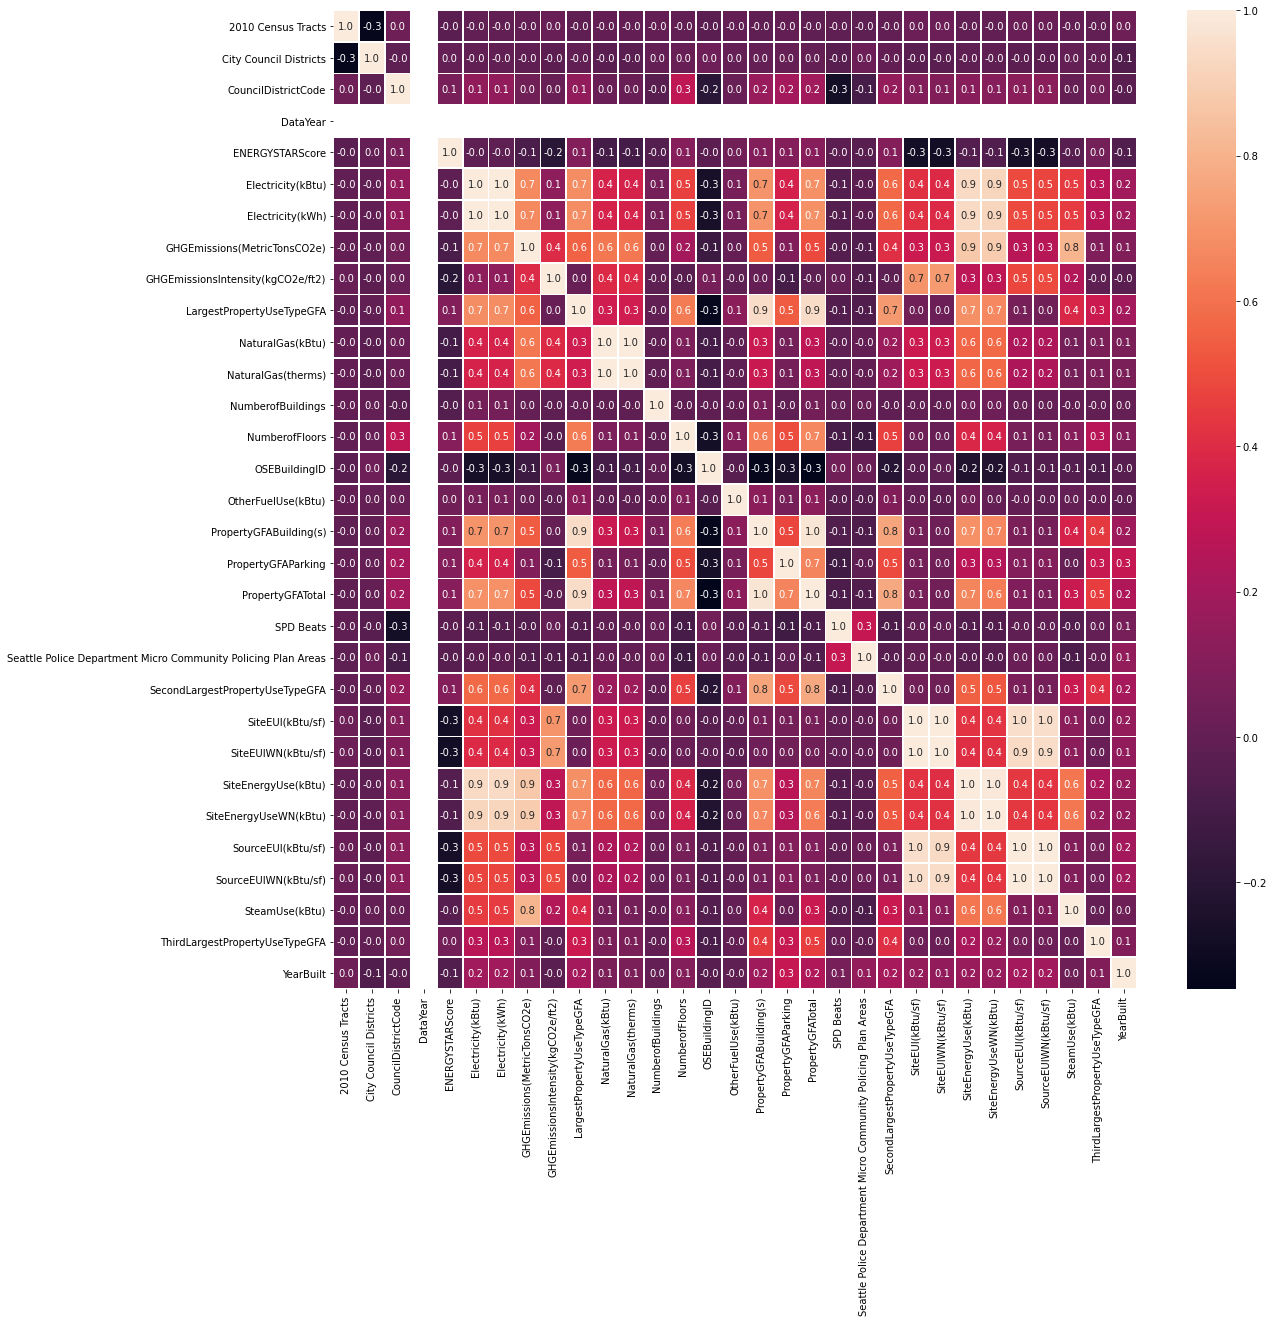

In [61]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df_nr.corr(), annot=True, linewidths=.8, fmt= '.1f',ax=ax)

In [84]:
drop_list=["DataYear","2010 Census Tracts","City Council Districts","Electricity(kWh)","NaturalGas(therms)","PropertyGFABuilding(s)",
          "SiteEUI(kBtu/sf)","SiteEnergyUse(kBtu)","SourceEUI(kBtu/sf)","LargestPropertyUseTypeGFA","SecondLargestPropertyUseTypeGFA",
           "Seattle Police Department Micro Community Policing Plan Areas","NumberofFloors","SiteEUIWN(kBtu/sf)","PropertyGFAParking",
          "DefaultData","YearBuilt","SPD Beats","ThirdLargestPropertyUseTypeGFA","NumberofBuildings","OSEBuildingID","CouncilDistrictCode"]

In [85]:
df_nr_1=df_nr.drop(drop_list,axis=1)
#df_2015_x=df_2015.drop(drop_list,axis=1)
#df_1=df.drop(drop_list,axis=1)

In [86]:
df_nr_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1461 entries, 0 to 3334
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   BuildingType                       1461 non-null   object 
 1   ComplianceStatus                   1461 non-null   object 
 2   ENERGYSTARScore                    1461 non-null   float64
 3   Electricity(kBtu)                  1461 non-null   float64
 4   GHGEmissions(MetricTonsCO2e)       1461 non-null   float64
 5   GHGEmissionsIntensity(kgCO2e/ft2)  1461 non-null   float64
 6   Location                           1461 non-null   object 
 7   NaturalGas(kBtu)                   1461 non-null   float64
 8   Neighborhood                       1461 non-null   object 
 9   OtherFuelUse(kBtu)                 1461 non-null   float64
 10  PrimaryPropertyType                1461 non-null   object 
 11  PropertyGFATotal                   1461 non-null   int64

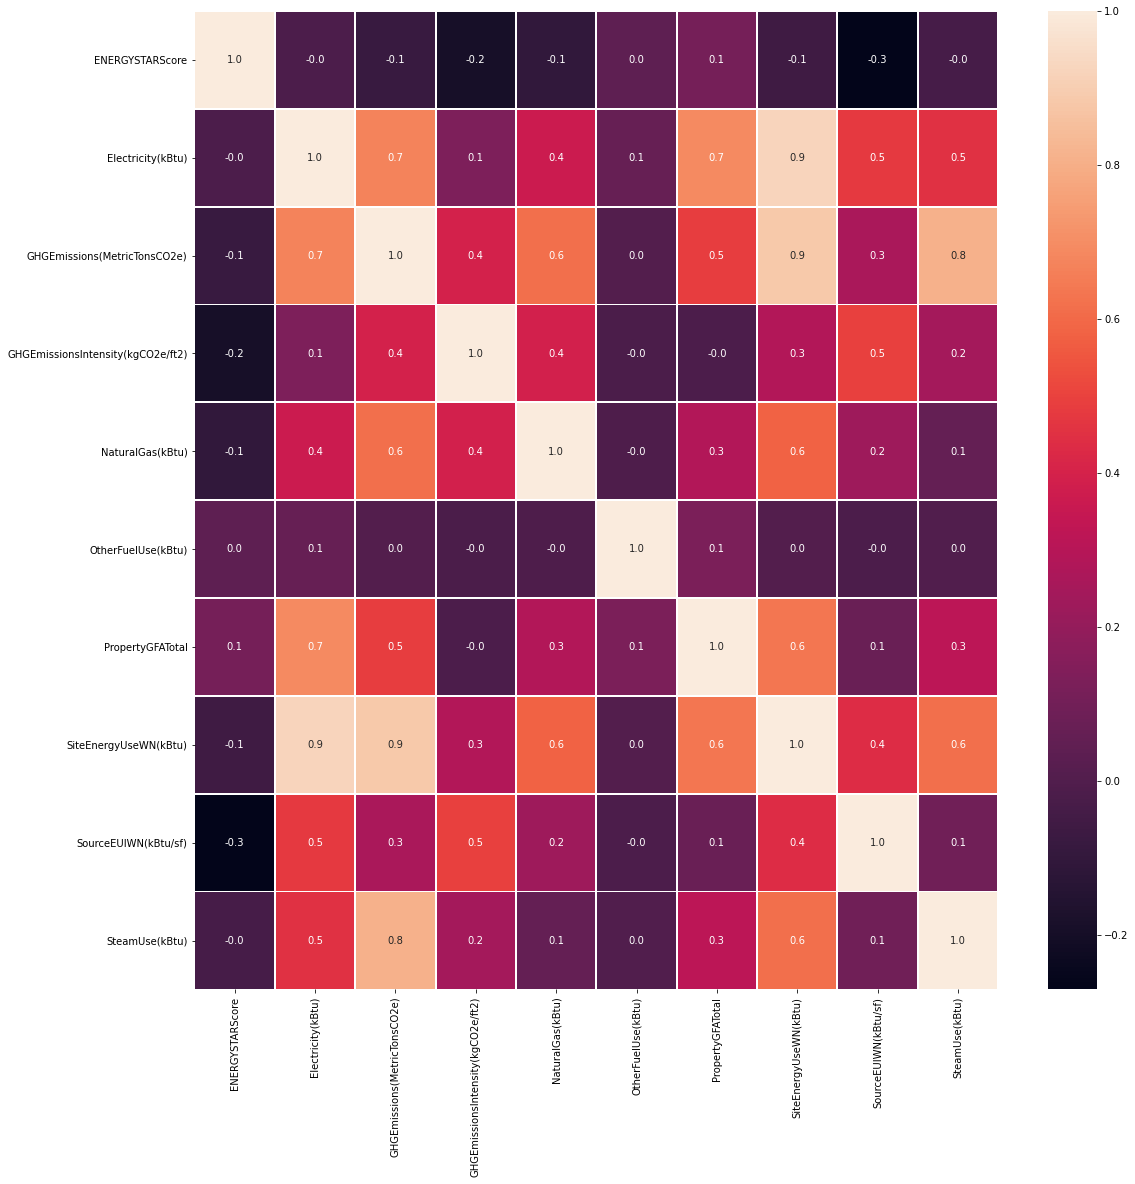

In [88]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df_nr_1.corr(), annot=True, linewidths=.8, fmt= '.1f',ax=ax)

In [89]:
##To select  numeric types and object types
df_nr_1_num=df_nr_1.select_dtypes(np.number)
df_nr_1_obj=df_nr_1.select_dtypes('object')

In [91]:
df_nr_1_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1461 entries, 0 to 3334
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ENERGYSTARScore                    1461 non-null   float64
 1   Electricity(kBtu)                  1461 non-null   float64
 2   GHGEmissions(MetricTonsCO2e)       1461 non-null   float64
 3   GHGEmissionsIntensity(kgCO2e/ft2)  1461 non-null   float64
 4   NaturalGas(kBtu)                   1461 non-null   float64
 5   OtherFuelUse(kBtu)                 1461 non-null   float64
 6   PropertyGFATotal                   1461 non-null   int64  
 7   SiteEnergyUseWN(kBtu)              1461 non-null   float64
 8   SourceEUIWN(kBtu/sf)               1461 non-null   float64
 9   SteamUse(kBtu)                     1461 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 165.6 KB


In [ ]:
df["GHGEmissionsIntensity(kgCO2e/ft2)"]=(df["GHGEmissionsIntensity(kgCO2e/ft2)"]-df["GHGEmissionsIntensity(kgCO2e/ft2)"].mean())/df["GHGEmissionsIntensity(kgCO2e/ft2)"].std()

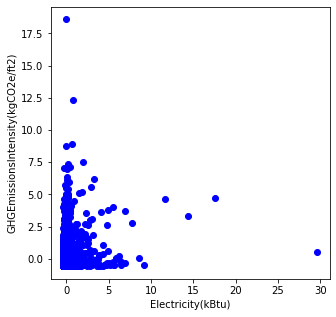

In [149]:
plt.figure(figsize=(5,5))
df["GHGEmissionsIntensity(kgCO2e/ft2)"]=(df["GHGEmissionsIntensity(kgCO2e/ft2)"]-df["GHGEmissionsIntensity(kgCO2e/ft2)"].mean())/df["GHGEmissionsIntensity(kgCO2e/ft2)"].std()
df["Electricity(kBtu)"]=(df["Electricity(kBtu)"]-df["Electricity(kBtu)"].mean())/df["Electricity(kBtu)"].std()
plt.scatter(df["Electricity(kBtu)"],df["GHGEmissionsIntensity(kgCO2e/ft2)"],  color='blue')
plt.xlabel("Electricity(kBtu)")
plt.ylabel("GHGEmissionsIntensity(kgCO2e/ft2)")
plt.show()

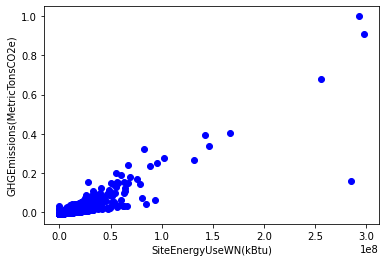

In [115]:
plt.scatter(df["SiteEnergyUseWN(kBtu)"],df["GHGEmissions(MetricTonsCO2e)"],  color='blue')
plt.xlabel("SiteEnergyUseWN(kBtu)")
plt.ylabel("GHGEmissions(MetricTonsCO2e)")
plt.show()

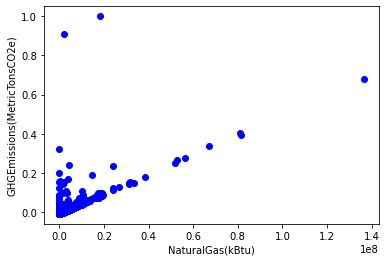

In [116]:
plt.scatter(df["NaturalGas(kBtu)"],df["GHGEmissions(MetricTonsCO2e)"],  color='blue')
plt.xlabel("NaturalGas(kBtu)")
plt.ylabel("GHGEmissions(MetricTonsCO2e)")
plt.show()

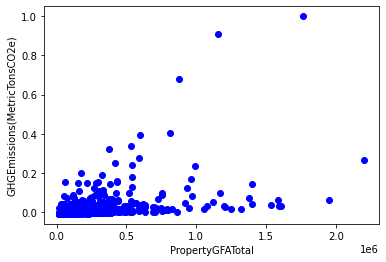

In [117]:
plt.scatter(df["PropertyGFATotal"],df["GHGEmissions(MetricTonsCO2e)"],  color='blue')
plt.xlabel("PropertyGFATotal")
plt.ylabel("GHGEmissions(MetricTonsCO2e)")
plt.show()

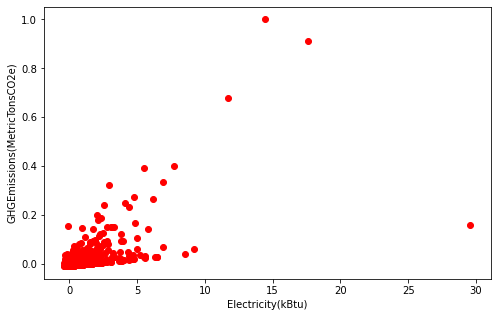

In [112]:
plt.figure(figsize=(8,5))
x_data, y_data = (df["Electricity(kBtu)"].values, df["GHGEmissions(MetricTonsCO2e)"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GHGEmissions(MetricTonsCO2e)')
plt.xlabel('Electricity(kBtu)')
plt.show()

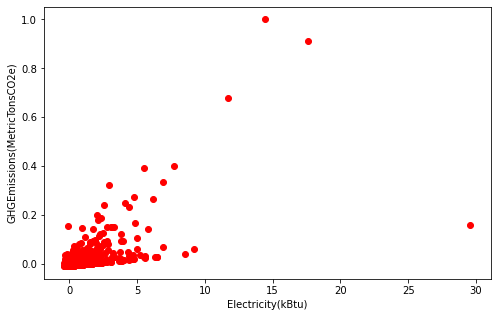

In [130]:
plt.figure(figsize=(8,5))
x_data, y_data = (df["Electricity(kBtu)"].values, df["GHGEmissions(MetricTonsCO2e)"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GHGEmissions(MetricTonsCO2e)')
plt.xlabel('Electricity(kBtu)')
plt.show()

In [161]:
msk = np.random.rand(len(df_nr_1_num)) < 0.8
train = df_nr_1_num[msk]
test = df_nr_1_num[~msk]
plt.scatter(train.SiteEnergyUseWN(kBtu), train.GHGEmissions(MetricTonsCO2e),  color='blue')
plt.xlabel("SiteEnergyUseWN(kBtu)")
plt.ylabel("GHGEmissions(MetricTonsCO2e)")
plt.show()

AttributeError: 'DataFrame' object has no attribute 'SiteEnergyUseWN'